# Practica 6 - Backpropagation y entrenamiento para XOR

Usar numpy para Entrenar un aproximador para la función Xor usando 2 capas intermedias. Tomando en cuenta: 
- Usar 2 neuronas en la capa anterior a la salida(segunda capa oculta).
- Usar al menos 2(pueden ser más) en la  primera capa oculta.
- Usar activación ReLu en las capas intermedias y  no activación en la salida

Realizar 5 experimentos, en cada experimento(corrida de entrenamiento):
- Inicializar los parámetros aleatoriamente con distribución normal centrada en 0 y std = 0.1
- Retornar la representación intermedia de la segunda capa oculta.
- Graficar las 5 representaciones intermedias(1 por experimento), comparar, comentar y/o concluir.

In [2]:
#Importamos las librerias que utilizaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset para Entrenamiento y Pruebas

Ya que crearemos una red reuronal para el entrenamiento de la función XOR, el dataset para entrenamiento y Pruebas es sencillo.

In [376]:
X = np.array([[1,1],[1,0],[0,1],[1,1]])
Y = np.array([[0],[1],[1],[0]])     

In [8]:
#Corroboramos que las dimensiones hayan quedado de Forma Correcta
print("Forma de Tensor X {}".format(X.shape))
print("Forma de Tensor Y {}".format(Y.shape))

Forma de Tensor X (4, 2)
Forma de Tensor Y (4, 1)


### Inicialización de Red Neuronal

De Acuerdo a la definición requerida, la red neuronal se creará de la siguiente forma:
- 2 capas intermedias (la primera capa intermedia tendrá 3 neuronas y la segunda 2 neuronas)
- Por nuestro dataset sabemos que el número de Entradas son 2.
- Se tiene una sola neurona para la salida final

In [467]:
#Ya que se realizarán varios experimentos - Se creará una función generica que nos permita
#Inicializar los datos de nuestra red reuronal
def initialize_network(n_inputs, n_hidden, n_outputs):
    #Aquí por defecto sabemos que el número de Capas intermedias son 2
    #y no haremos programación dinamica para poder crear N Capas intermedias
    #en la variable n_hidden vendrá un vector con el número de neuronas por cada capa.
    
    #Inicializamos los pesos sinapticos para las capas intermedias
    mu = 0
    sigma = 0.1
    weights_HL1 = np.random.normal(mu, sigma, ((n_inputs+1),n_hidden[0]))
    weights_HL2 = np.random.normal(mu, sigma, (weights_HL1.shape[1]+1,n_hidden[-1])) 
    #Inicializamos los pesos sinapticos para la capa de Salida
    weights_OL = np.random.normal(mu, sigma, (weights_HL2.shape[1]+1,n_outputs)) 
    
    return weights_HL1,weights_HL2,weights_OL

Probamos la función de inicialización de la red Neuronal

In [468]:
#Número de Entradas de nuestro modelo
n_inputs= 2
#Número de Neuronas en cada capa intermedia
n_hidden=[3,2]

#Número de Neuronas de Salida
n_outputs=1

weights_HL1,weights_HL2,weights_OL = initialize_network(n_inputs, n_hidden, n_outputs)
print("Inicialización Red Reuronal")
print("Número de Datos de Entrada =",n_inputs)
print("Número de Neuronas Capa Intermedia 1= {}, Número de Neuronas Capa Intermedia 2={}".format(n_hidden[0],n_hidden[1]))
print("Número de Neuronas Capa de Salida {}".format(n_outputs))
print("Pesos Sinapticos de Capa Intermedia 1(Incluye Bias)")
print(weights_HL1)
print("Pesos Sinapticos de Capa Intermedia 2(Incluye Bias)")
print(weights_HL2)
print("Pesos Sinapticos de Capa de Salida (Incluye Bias)")
print(weights_OL)

Inicialización Red Reuronal
Número de Datos de Entrada = 2
Número de Neuronas Capa Intermedia 1= 3, Número de Neuronas Capa Intermedia 2=2
Número de Neuronas Capa de Salida 1
Pesos Sinapticos de Capa Intermedia 1(Incluye Bias)
[[ 0.17233229 -0.05172044 -0.16696745]
 [ 0.07494903  0.02273063  0.10695654]
 [-0.17977561 -0.040798   -0.17498363]]
Pesos Sinapticos de Capa Intermedia 2(Incluye Bias)
[[0.08737404 0.03089645]
 [0.20822164 0.10835795]
 [0.03343692 0.09905037]
 [0.05146819 0.02031761]]
Pesos Sinapticos de Capa de Salida (Incluye Bias)
[[-0.15735626]
 [-0.03564019]
 [-0.01964896]]


### Foward Propagation

De acuerdo al enunciado, para esta red reuronal se usará la función de activación ReLU (Rectified Linear Unit).

In [469]:
#Creamos la función de Activación - RelU
def ReLU(X):
    return np.maximum(X, 0)

Creamos función sencilla para realizar el Forward Propagation de nuestra red Neuronal

In [470]:
def forwad_propagation(X,WC1,WC2,WCS,bias_include):
    #Colocamos una bandera que nos indica si los pesos incluyen bias
    #bias_include=True or False
    if bias_include:
        #El Bias se incluye como un valor 1 en la última columna.
        Bias= np.ones(len(X)).reshape(-1,1)
        X= np.hstack((X,Bias))
    
    #Se hace el Cálculo de la Primera capa oculta
    HL1 = ReLU(np.matmul(X,WC1))
    
    if bias_include:
        #El Bias se incluye como un valor 1 en la última columna.
        Bias= np.ones(len(HL1)).reshape(-1,1)
        HL1= np.hstack((HL1,Bias))
    
    #Se hace el Cálculo de la Capa de Salida
    HL2 = ReLU(np.matmul(HL1,WC2))

    if bias_include:
        #El Bias se incluye como un valor 1 en la última columna.
        Bias= np.ones(len(HL2)).reshape(-1,1)
        HL2= np.hstack((HL2,Bias))
    
    #Se hace el Cálculo de la Capa de Salida - Esta no usará función de Activación
    OL = np.matmul(HL2,WCS)
    
    #Devolvemos los resultados de la Capa Oculta 2, así como el Resultado (OL)
    return X,HL1,HL2,OL

Hacemos una prueba de la función de Forward propagation creada

In [377]:
#Hacemos una prueba de nuestra función
XT,H1,H2,Resultado = forwad_propagation(X,weights_HL1,weights_HL2,weights_OL,True)
Resultado

array([[0.17679449],
       [0.17754752],
       [0.17702532],
       [0.17679449]])

### Back-propagation

Para realizar el Back-Propagation, es necesario contar con la derivada de la función de activación. Se construye la función a continuación:

In [471]:
#Creamos la función derivada de la función de Activación - RelU
def ReLU_Derivative(x):
    #Esto se hace para que no sobreescriba los valores del arreglo recibido en parametros
    z = np.copy(x)
    
    z[z<=0] = 0
    z[z>0] = 1
    return z

Creamos función para realizar el Back-Propagation del Error en nuestra red Neuronal

In [566]:
#Creamos la función generica para realizar el Backpropagation
def backward_propagate_error(X,weights_HL1,weights_HL2,weights_OL,H1,H2,Resultado,Y,lr):
    #Aquí se acumularan los deltas de los errores en capa capa
    delta_weights_i_h1 = np.zeros_like(weights_HL1)
    delta_weights_h1_h2 = np.zeros_like(weights_HL2)
    delta_weights_h2_o = np.zeros_like(weights_OL)

    #Recorremos los Registros de nuestro dataset
    for correl in range(len(X)):

        #Se obtienen los registros a procesar
        target=Y[correl]
        y_hat= Resultado[0]

        #Se calcula el Error para este registro
        Error = target - y_hat

        #Se determina el Error en la neurona de Salida
        #Dado que no se uso función de activación en la capa de Salida aquí no se multipla por la derivada 
        OL_Error = Error

        #Se propaga el Error para las Neuornas en la Capa Intermedia 2
        HL2_Error = np.matmul(weights_OL,OL_Error)*ReLU_Derivative(H2[correl])

        #Se propaga el Error para las Neuornas en la Capa Intermedia 1 - Se quita el Bias del Error Anterior
        HL1_Error = np.matmul(weights_HL2,HL2_Error[:2])*ReLU_Derivative(H1[correl])

        delta_weights_i_h1 += np.matmul( X[correl].T.reshape(-1,1), HL1_Error[:weights_HL1.shape[1]].reshape(1,-1))
        delta_weights_h1_h2 += np.matmul( H1[correl].T.reshape(-1,1), HL2_Error[:weights_HL2.shape[1]].reshape(1,-1))
        delta_weights_h2_o += np.matmul( H2[correl].T.reshape(-1,1), OL_Error.reshape(1,-1))

    #Actualizamos los pesos sinapticos
    weights_OL +=  lr * delta_weights_h2_o/len(X)
    weights_HL2 +=  lr * delta_weights_h1_h2/len(X)
    weights_HL1 +=  lr * delta_weights_i_h1/len(X)

In [567]:
#Definimos el Learning rate
lr= 0.1

#Probamos la función para propagar el error
backward_propagate_error(XT,weights_HL1,weights_HL2,weights_OL,H1,H2,Resultado,Y,lr)

### Entrenamiento Red Neuronal
Creamos una función que consolide las funciones anteriores para realizar el entrenamiento de nuestra red neuronal.

In [615]:
#Función de Entrenamiento para la red Reuronal 
def train_network(X,Y, lr, n_epoch,n_inputs,n_hidden, n_outputs):
    
    weights_HL1,weights_HL2,weights_OL = initialize_network(n_inputs, n_hidden, n_outputs)
    
    print("--------------------------------------------------")
    print("              Inicialización Red Reuronal")
    print("--------------------------------------------------")
    print("Número de Datos de Entrada =",n_inputs)
    print("Número de Neuronas Capa Intermedia 1= {}, Número de Neuronas Capa Intermedia 2={}".format(n_hidden[0],n_hidden[1]))
    print("Número de Neuronas Capa de Salida= {}".format(n_outputs))
    print("Pesos Sinapticos de Capa Intermedia 1(Incluye Bias)")
    print(weights_HL1)
    print("Pesos Sinapticos de Capa Intermedia 2(Incluye Bias)")
    print(weights_HL2)
    print("Pesos Sinapticos de Capa de Salida (Incluye Bias)")
    print(weights_OL)
    print("--------------------------------------------------")
    print("                    Entrenamiento")
    print("--------------------------------------------------")
    for epoch in range(n_epoch):

        #Realizamos el Foward Propagation
        XT,H1,H2,Resultado = forwad_propagation(X,weights_HL1,weights_HL2,weights_OL,True)

        #Early Stop - En caso llegamos a convergencia nos salimos
        convergencia = (Y ==Resultado.astype('int')).all()

        #En caso tener convergencia nos salimos
        if convergencia:
            
            break

        #En Caso contrario continuamos
        error= sum([(Y[i]-Resultado[i])**2 for i in range(len(Y))])

        #Hacemos backprogation y actualizamos los pesos
        backward_propagate_error(XT,weights_HL1,weights_HL2,weights_OL,H1,H2,Resultado,Y,lr)

        if (epoch+1) % imprimir_cada == 0:
            print('epoch=%d, lrate=%.3f, error=%.3f' % (epoch, lr, error))
    print("--------------------------------------------------")
    print("       Finalización Entrenamiento Red Reuronal")
    print("--------------------------------------------------")
    print("Despues de Entrenamiento los Pesos sinapticos quedan de la siguiente forma")
    print("Pesos Sinapticos de Capa Intermedia 1(Incluye Bias)")
    print(weights_HL1)
    print("Pesos Sinapticos de Capa Intermedia 2(Incluye Bias)")
    print(weights_HL2)
    print("Pesos Sinapticos de Capa de Salida (Incluye Bias)")
    print(weights_OL)
    print("-------------------------------------------------")        
    print("Calculo de Datos (Foward Propagation con Pesos finales)")
    print("-------------------------------------------------") 
    _,_,Intermedia,Resultado = forwad_propagation(X,weights_HL1,weights_HL2,weights_OL,True)
    #Redondeamos los resultados a Cero decimales
    Intermedia= np.round(Intermedia,4)
    Resultado = Resultado.astype('int')
    print(Resultado)
    
    print("-------------------------------------------------")        
    print("      Representación Datos - Capa Intermedia 2")
    print("-------------------------------------------------") 
    #Calculamos la Matriz de todas las posibles combinaciones XOR con su resultado
    matriz = pd.DataFrame({'X1':np.array(X).reshape(-1,2)[:,0],
                           'X2':np.array(X).reshape(-1,2)[:,1],
                           'H1':Intermedia[:,0],
                           'H2':Intermedia[:,1],
                           'Y' :Y[:,0]})
    print(matriz)
    #Realizamos la representación de la capa intermedia por medio de una grafica de puntos
    plt.scatter(matriz[matriz['Y']==0]['H1'], matriz[matriz['Y']==0]['H2'], color='r', label="False(0)")
    plt.scatter(matriz[matriz['Y']==1]['H1'], matriz[matriz['Y']==1]['H2'], color='b', label="True(1)")
    plt.title('Representación Capa Intermedia')
    plt.xlabel('H1')
    plt.ylabel('H2')
    plt.legend()
    plt.show()

### Experimentos

#### Experimento 1 (CONVERGENCIA)

Primer Experimento -  Se usarán 3 Neuronas en la capa intermedia 1 y 2 Neuronas en la capa intermedia 2.

--------------------------------------------------
              Inicialización Red Reuronal
--------------------------------------------------
Número de Datos de Entrada = 2
Número de Neuronas Capa Intermedia 1= 3, Número de Neuronas Capa Intermedia 2=2
Número de Neuronas Capa de Salida= 1
Pesos Sinapticos de Capa Intermedia 1(Incluye Bias)
[[ 0.01695311 -0.0658081   0.00023172]
 [ 0.22810857  0.08029225 -0.02460384]
 [-0.05604943 -0.00930267  0.04294412]]
Pesos Sinapticos de Capa Intermedia 2(Incluye Bias)
[[ 0.01148974 -0.07835332]
 [-0.05450648 -0.13631887]
 [ 0.1328478  -0.10259862]
 [ 0.0746963   0.09881608]]
Pesos Sinapticos de Capa de Salida (Incluye Bias)
[[0.0567138 ]
 [0.05465475]
 [0.13397715]]
--------------------------------------------------
                    Entrenamiento
--------------------------------------------------
epoch=99, lrate=0.100, error=0.996
epoch=199, lrate=0.100, error=0.986
epoch=299, lrate=0.100, error=0.943
epoch=399, lrate=0.100, error=0.701
-----

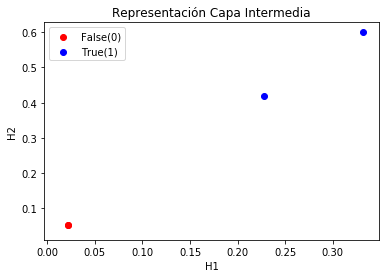

In [616]:
n_epoch=1000
imprimir_cada=100

#Definimos el Learning rate
lr= 0.1

#Inicializamos la red reuronal
#Número de Entradas de nuestro modelo
n_inputs= 2
#Número de Neuronas en cada capa intermedia
n_hidden=[3,2]

#Número de Neuronas de Salida
n_outputs=1

train_network(X,Y, lr, n_epoch,n_inputs,n_hidden, n_outputs)

##### Conclusiones Experimento 1

- En este experimento se llego a la convergencia en el entrenamiento 400 (aproximadamente).
- Con la representación de la capa intermedia, podemos ver que ya se podría hacer hacer una división lineal de los resultados que estamos buscando clasificar; aunque es de notar que dado que la última neurona no tiene una función de activación, realmente lo que se esta buscando es una regresión lineal normal.

#### Experimento 2 (CONVERGENCIA)

Se usarán 2 Neuronas en la capa intermedia 1 y 2 Neuronas en la capa intermedia 2.

--------------------------------------------------
              Inicialización Red Reuronal
--------------------------------------------------
Número de Datos de Entrada = 2
Número de Neuronas Capa Intermedia 1= 2, Número de Neuronas Capa Intermedia 2=2
Número de Neuronas Capa de Salida= 1
Pesos Sinapticos de Capa Intermedia 1(Incluye Bias)
[[ 0.03374139 -0.04201904]
 [ 0.00455907  0.05787899]
 [ 0.02926606  0.01517006]]
Pesos Sinapticos de Capa Intermedia 2(Incluye Bias)
[[ 0.13459337  0.00530823]
 [-0.11629894 -0.02026275]
 [ 0.05668251  0.03455993]]
Pesos Sinapticos de Capa de Salida (Incluye Bias)
[[-0.06501187]
 [ 0.0878219 ]
 [ 0.05568433]]
--------------------------------------------------
                    Entrenamiento
--------------------------------------------------
epoch=99, lrate=0.100, error=0.999
epoch=199, lrate=0.100, error=0.999
epoch=299, lrate=0.100, error=0.997
epoch=399, lrate=0.100, error=0.994
epoch=499, lrate=0.100, error=0.984
epoch=599, lrate=0.100, error

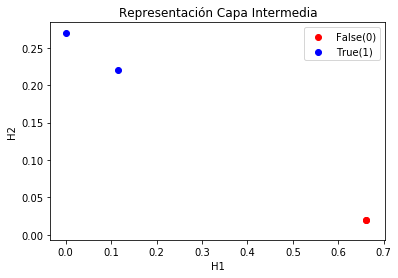

In [622]:
n_epoch=1000
imprimir_cada=100

#Definimos el Learning rate
lr= 0.1

#Inicializamos la red reuronal
#Número de Entradas de nuestro modelo
n_inputs= 2
#Número de Neuronas en cada capa intermedia
n_hidden=[2,2]

#Número de Neuronas de Salida
n_outputs=1

train_network(X,Y, lr, n_epoch,n_inputs,n_hidden, n_outputs)

##### Conclusiones Experimento 2

- En este experimento se llego a la convergencia en el entrenamiento 700 (aproximadamente).
- Con la representación de la capa intermedia, es un poco diferente a la obtenida en el ejercicio anterior, pero podemos ver que ya se podría hacer hacer una división lineal de los resultados que estamos buscando clasificar; aunque es de notar que dado que la última neurona no tiene una función de activación, realmente lo que se esta buscando es una regresión lineal normal.

#### Experimento 3 (CONVERGENCIA)

Se usarán 4 Neuronas en la capa intermedia 1 y 2 Neuronas en la capa intermedia 2.

--------------------------------------------------
              Inicialización Red Reuronal
--------------------------------------------------
Número de Datos de Entrada = 2
Número de Neuronas Capa Intermedia 1= 4, Número de Neuronas Capa Intermedia 2=2
Número de Neuronas Capa de Salida= 1
Pesos Sinapticos de Capa Intermedia 1(Incluye Bias)
[[ 0.04519711  0.00315043  0.0864439   0.04853546]
 [-0.04638351 -0.06032877 -0.08105174  0.11689624]
 [ 0.08033358  0.14401286  0.1401493   0.06929281]]
Pesos Sinapticos de Capa Intermedia 2(Incluye Bias)
[[ 0.0063208  -0.027297  ]
 [-0.22480594  0.06923434]
 [-0.08487157 -0.00963183]
 [ 0.17341999  0.12070921]
 [ 0.13425987 -0.06759591]]
Pesos Sinapticos de Capa de Salida (Incluye Bias)
[[ 0.16932468]
 [ 0.01058822]
 [-0.02147988]]
--------------------------------------------------
                    Entrenamiento
--------------------------------------------------
epoch=99, lrate=0.100, error=1.001
epoch=199, lrate=0.100, error=0.990
epoch=299, 

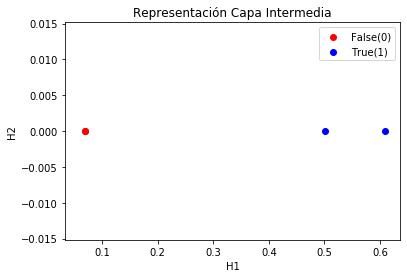

In [623]:
n_epoch=1000
imprimir_cada=100

#Definimos el Learning rate
lr= 0.1

#Inicializamos la red reuronal
#Número de Entradas de nuestro modelo
n_inputs= 2
#Número de Neuronas en cada capa intermedia
n_hidden=[4,2]

#Número de Neuronas de Salida
n_outputs=1

train_network(X,Y, lr, n_epoch,n_inputs,n_hidden, n_outputs)

##### Conclusiones Experimento 3

- En este experimento se llego a la convergencia en el entrenamiento 400 (aproximadamente).
- Con la representación de la capa intermedia, es un poco diferente a la obtenida en el ejercicio anterior, pero podemos ver que ya se podría hacer hacer una división lineal de los resultados que estamos buscando clasificar; aunque es de notar que dado que la última neurona no tiene una función de activación, realmente lo que se esta buscando es una regresión lineal normal.

#### Experimento 4 (NO CONVERGENCIA)

Se usarán 2 Neuronas en la capa intermedia 1 y 2 Neuronas en la capa intermedia 2 (Similar al experimento 2)

--------------------------------------------------
              Inicialización Red Reuronal
--------------------------------------------------
Número de Datos de Entrada = 2
Número de Neuronas Capa Intermedia 1= 2, Número de Neuronas Capa Intermedia 2=2
Número de Neuronas Capa de Salida= 1
Pesos Sinapticos de Capa Intermedia 1(Incluye Bias)
[[-0.0485737   0.20217422]
 [-0.10908681 -0.03814959]
 [ 0.04248057 -0.10138844]]
Pesos Sinapticos de Capa Intermedia 2(Incluye Bias)
[[-0.00820658  0.04670463]
 [-0.00752083  0.09775214]
 [ 0.06576083 -0.10065788]]
Pesos Sinapticos de Capa de Salida (Incluye Bias)
[[-0.0095818 ]
 [ 0.00542505]
 [ 0.07555201]]
--------------------------------------------------
                    Entrenamiento
--------------------------------------------------
epoch=99, lrate=0.100, error=1.000
epoch=199, lrate=0.100, error=1.000
epoch=299, lrate=0.100, error=1.000
epoch=399, lrate=0.100, error=1.000
epoch=499, lrate=0.100, error=1.000
epoch=599, lrate=0.100, error

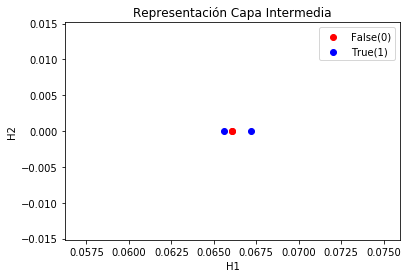

In [626]:
n_epoch=1000
imprimir_cada=100

#Definimos el Learning rate
lr= 0.1

#Inicializamos la red reuronal
#Número de Entradas de nuestro modelo
n_inputs= 2
#Número de Neuronas en cada capa intermedia
n_hidden=[2,2]

#Número de Neuronas de Salida
n_outputs=1

train_network(X,Y, lr, n_epoch,n_inputs,n_hidden, n_outputs)

##### Conclusiones Experimento 4

- En este experimento No se llego a la convergencia en los 1000 entrenamientos del modelo.
- Si vemos la representación intermedia, se ve que no hay una clara separación de los datos, por lo mismo no se llega a una convergencia.

#### Experimento 5 (NO CONVERGENCIA)

Se usarán 3 Neuronas en la capa intermedia 1 y 2 Neuronas en la capa intermedia 2 (Similar al experimento 1)

--------------------------------------------------
              Inicialización Red Reuronal
--------------------------------------------------
Número de Datos de Entrada = 2
Número de Neuronas Capa Intermedia 1= 3, Número de Neuronas Capa Intermedia 2=2
Número de Neuronas Capa de Salida= 1
Pesos Sinapticos de Capa Intermedia 1(Incluye Bias)
[[-0.0158699   0.03216985 -0.0132194 ]
 [ 0.03914382  0.05911775  0.08952022]
 [-0.07292908  0.07209696  0.17347892]]
Pesos Sinapticos de Capa Intermedia 2(Incluye Bias)
[[ 0.08170979 -0.03993468]
 [ 0.08480708  0.20179277]
 [-0.13118088 -0.04888444]
 [-0.13250645 -0.07025691]]
Pesos Sinapticos de Capa de Salida (Incluye Bias)
[[-0.14083397]
 [-0.22378656]
 [ 0.16950595]]
--------------------------------------------------
                    Entrenamiento
--------------------------------------------------
epoch=99, lrate=0.100, error=1.000
epoch=199, lrate=0.100, error=1.000
epoch=299, lrate=0.100, error=1.000
epoch=399, lrate=0.100, error=1.000
ep

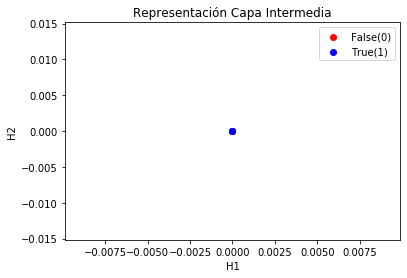

In [631]:
n_epoch=1000
imprimir_cada=100

#Definimos el Learning rate
lr= 0.1

#Inicializamos la red reuronal
#Número de Entradas de nuestro modelo
n_inputs= 2
#Número de Neuronas en cada capa intermedia
n_hidden=[3,2]

#Número de Neuronas de Salida
n_outputs=1

train_network(X,Y, lr, n_epoch,n_inputs,n_hidden, n_outputs)

##### Conclusiones Experimento 5

- En este experimento No se llego a la convergencia en los 1000 entrenamientos del modelo.
- Aquí por alguna razón, no pudo lograr una buena representación intermedia, al parecer se quedó en un punto estacionario en el cálculo de gradientes, por lo mismo no vario durante el entrenamiento.

### Conclusiones Generales

- Al no tener una función de activación en la última neurona, esta busca una aproximación con regresión lineal al problema que estamos buscando (XOR).
- Si se hubiera tenido en la última neurona una función de activación como Sigmoid, se hubiera buscado una aproximación con regresión logistica, lo cual pudo (en teoria) facilitar el calculo de la función XOR.

